In [1]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def gradient_descent(alpha, x, y, ep, max_iter):
    converged = False
    iter = 0
    m = x.shape[0] #size of training set
    #print(x)
    #print("\n")
    print(y.shape)
    #print("\n")
    #print(y)
    #initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])
    
    #cost function
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
    
    #iterate loop
    while not converged:
        grad0 = 1.0/m * sum([t0 + t1*x[i] - y[i] for i in range(m)])
        t0 = t0 - (alpha * grad0)
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])
        t1 = t1 - (alpha * grad1)
        
        err = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
        
        if abs(J-err) <= ep:
            print('Converged, iterations: ', iter)
            converged = True
        
        J = err #update error
        iter += 1 #update iter
        
        if iter % 50 == 0:
            print('Iteration: %d\tLoss: %.2f' % (iter, err))
            
        if iter == max_iter:
            print('Max iterations reached')
            converged = True
            
    return t0, t1

In [3]:
x, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, random_state = 0, noise = 10)
print('x.shape', x.shape, ' = y.shape = ', y.shape)

x.shape (100, 1)  = y.shape =  (100,)


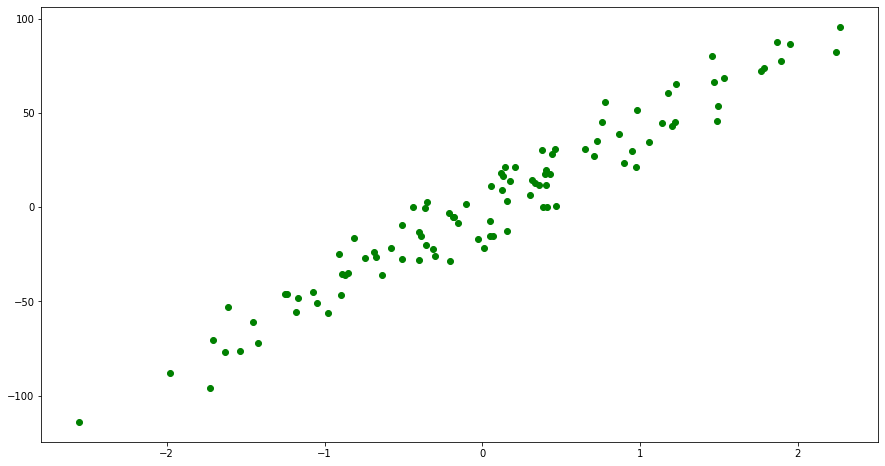

In [4]:


plt.figure(figsize = (15,8))
plt.plot(x, y, 'go')
plt.show()



In [5]:
alpha = 0.01 #learning rate
ep = 0.01 #error limit for convergence
    
#run gradient descent, obtain theta
theta0, theta1 = gradient_descent(alpha, x, y, ep, 1000)
print('theta0 = ', theta0, 'theta1 = ', theta1)

(100,)
Iteration: 50	Loss: 75415.05
Iteration: 100	Loss: 34502.66
Iteration: 150	Loss: 19775.63
Iteration: 200	Loss: 14454.77
Iteration: 250	Loss: 12525.17
Iteration: 300	Loss: 11822.80
Iteration: 350	Loss: 11566.19
Iteration: 400	Loss: 11472.10
Iteration: 450	Loss: 11437.48
Iteration: 500	Loss: 11424.69
Iteration: 550	Loss: 11419.96
Iteration: 600	Loss: 11418.20
Converged, iterations:  637
theta0 =  [-0.78680428] theta1 =  [42.55345789]


In [6]:
#check with scipy linear regression
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print('intercept = ', intercept, 'slope = ', slope)

intercept =  -0.8141818270307257 slope =  42.619430291366946


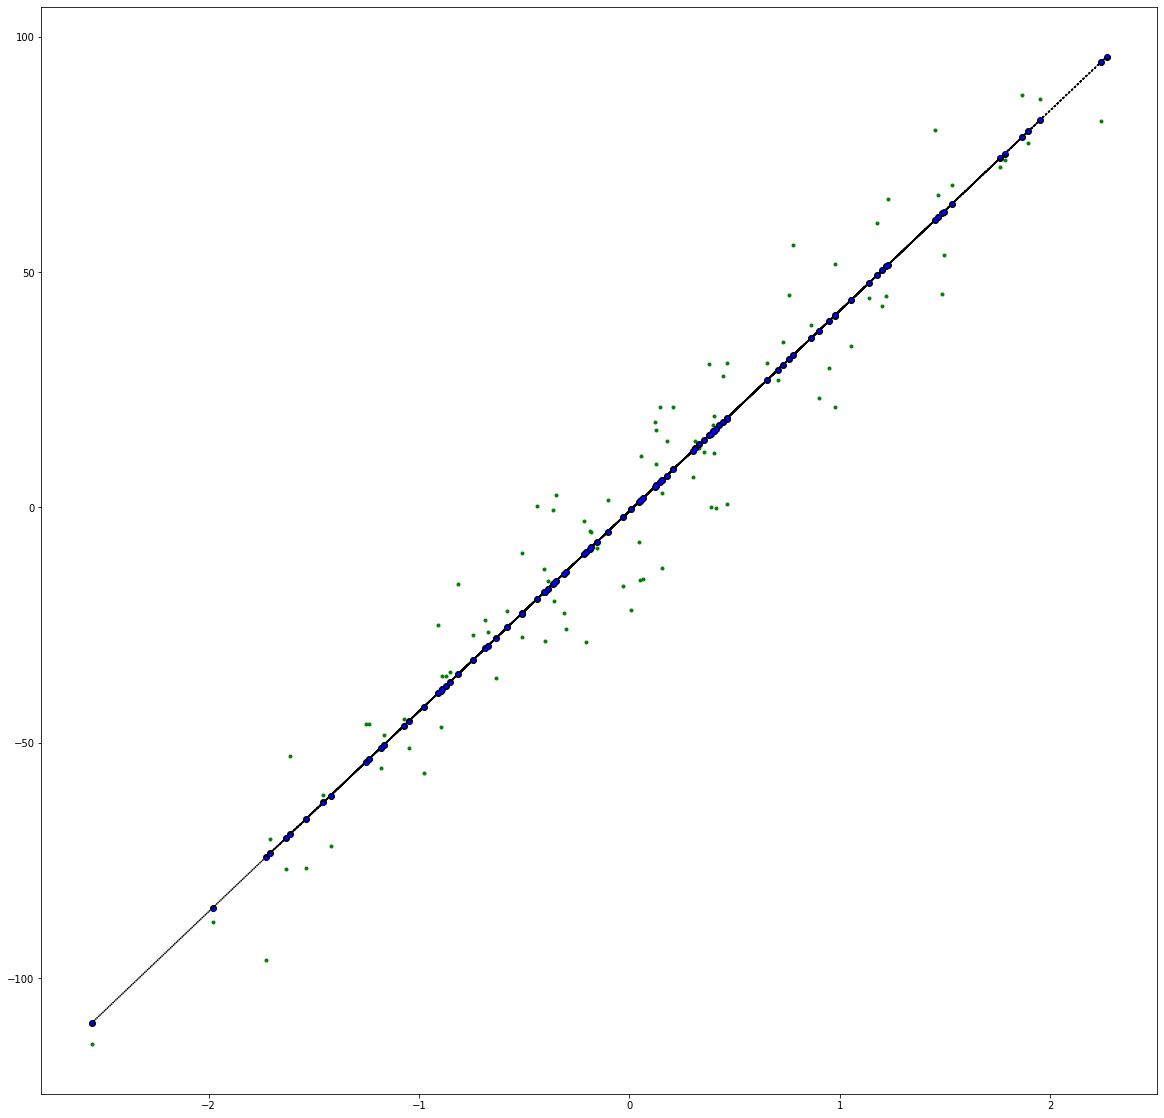

In [7]:
for i in range(x.shape[0]):
    y_predict = theta0 + theta1*x
    y_actual = intercept + slope*x

plt.figure(figsize = (20,20))
plt.plot(x, y, 'g.')
plt.plot(x, y_predict, 'o:k')
plt.plot(x,y_actual,'b.')
plt.show()